In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim, flatten
from torch.nn import Linear, Conv2d, MaxPool2d, BatchNorm2d, Module, Dropout, ReLU
import torch.nn.functional as F
torch.manual_seed(0)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("available core is", device)

available core is cuda


# MNIST Dataset

length of trainset is: torch.Size([60000, 28, 28])
length of trainloader is: 938
Shape of images is: torch.Size([64, 1, 28, 28])
Shape of label is: torch.Size([64])


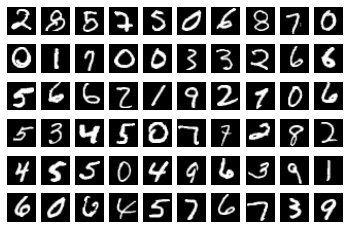

In [17]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,), (0.5,)),
                               ])

trainset = datasets.MNIST('./', download=True, train=True,  transform=transform)
testset = datasets.MNIST('./', download=True, train=False, transform=transform)
print('length of trainset is:',trainset.data.size())

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
print('length of trainloader is:',len(trainloader))

dataiter = iter(trainloader)
images,labels = dataiter.next()
print("Shape of images is:",images.shape)
print('Shape of label is:',labels.shape)
#plt.imshow(images[0].numpy().squeeze(), cmap='gray')

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images+1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray')

# Deep Neural Network (DNN)

In [3]:
class DNN0(nn.Module):
    def __init__(self):
        super(DNN0, self).__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32,16)
        self.fc5 = nn.Linear(16,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.log_softmax(self.fc5(x), dim=1)       
        return x
    
class DNN1(nn.Module):
    def __init__(self):
        super(DNN1, self).__init__()
        self.fc1 = nn.Linear(784,16)
        self.fc2 = nn.Linear(16,32)
        self.fc3 = nn.Linear(32,32)
        self.fc4 = nn.Linear(32,32)
        self.fc5 = nn.Linear(32,32)
        self.fc6 = nn.Linear(32,32)
        self.fc7 = nn.Linear(32,16)
        self.fc8 = nn.Linear(16,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.log_softmax(self.fc8(x), dim=1)       
        return x
    
class DNN2(nn.Module):
    def __init__(self):
        super(DNN2, self).__init__()
        self.fc1 = nn.Linear(784,512)
        self.fc2 = nn.Linear(512,10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.log_softmax(self.fc2(x), dim=1)       
        return x


In [4]:
network={0: DNN0(), 1: DNN1(), 2: DNN2() }

model_loss = {'loss0': [], 'loss1': [], 'loss2': [] }

model_acc = {'acc0': [], 'acc1': [], 'acc2': [] }

test_loss = {'loss0': [], 'loss1': [], 'loss2': [] }

test_acc = {'acc0': [], 'acc1': [], 'acc2': [] }

epoch = 40
loss_fn = nn.NLLLoss()
for i in range(len(network)):
    print(f'\n===========================================Model{i}============================================')
    model = network[i]
    model.to(device)
    #print(model)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    lossdic = model_loss['loss'+str(i)] 
    accdic = model_acc['acc'+str(i)]
    testacc = test_acc['acc'+str(i)]
    tlossdic = test_loss['loss'+str(i)] 
    
    step=0
    for e in range(epoch):
        train_loss = 0
        trainacc = 0
        for images, labels in trainloader:
            step+=1
            images, labels = images.to(device), labels.to(device)
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            logps = model(images) #forward propagation
            loss = loss_fn(logps, labels) #calculate loss
            loss.backward() #backward propagation
            optimizer.step() #update weights
            loss = loss.item()
            train_loss+=loss
            _, pred = logps.max(1)
            trainacc += (pred == labels).sum().item()

        with torch.no_grad():
            model.eval()
            acc = 0
            testloss = 0
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                images = images.view(images.shape[0], -1)
                output = model(images)
                testloss += loss_fn(output, labels).item()
                _, pred = output.max(1)
                acc += (pred == labels).sum().item()
            if e%10 == 0:
                print("Epoch: {}/{}  Step:{}  Train Loss: {:.6f}  Train Acc: {:.2f}%  Val Loss: {:.6f}  Val Acc: {:.2f}%"\
                      .format(e, epoch, step, train_loss/len(trainloader), trainacc/len(trainset)*100, testloss/len(testloader), acc/len(testset)*100))
            lossdic.append(train_loss/len(trainloader))
            accdic.append(trainacc/len(trainset))
            testacc.append(acc/len(testset))
            tlossdic.append(testloss/len(testloader))
        model.train()


===========================================Model0============================================
Epoch: 0/40  Step:938  Train Loss: 0.533764  Train Acc: 83.31%  Val Loss: 0.269334  Val Acc: 91.64%
Epoch: 10/40  Step:10318  Train Loss: 0.062515  Train Acc: 97.99%  Val Loss: 0.114639  Val Acc: 96.63%
Epoch: 20/40  Step:19698  Train Loss: 0.032604  Train Acc: 98.91%  Val Loss: 0.106047  Val Acc: 97.25%
Epoch: 30/40  Step:29078  Train Loss: 0.023249  Train Acc: 99.25%  Val Loss: 0.106604  Val Acc: 97.50%

===========================================Model1============================================
Epoch: 0/40  Step:938  Train Loss: 1.352788  Train Acc: 50.27%  Val Loss: 0.952686  Val Acc: 68.80%
Epoch: 10/40  Step:10318  Train Loss: 0.311219  Train Acc: 90.51%  Val Loss: 0.310102  Val Acc: 90.43%
Epoch: 20/40  Step:19698  Train Loss: 0.250634  Train Acc: 92.36%  Val Loss: 0.264672  Val Acc: 91.96%
Epoch: 30/40  Step:29078  Train Loss: 0.222026  Train Acc: 93.13%  Val Loss: 0.256128  Val Acc:

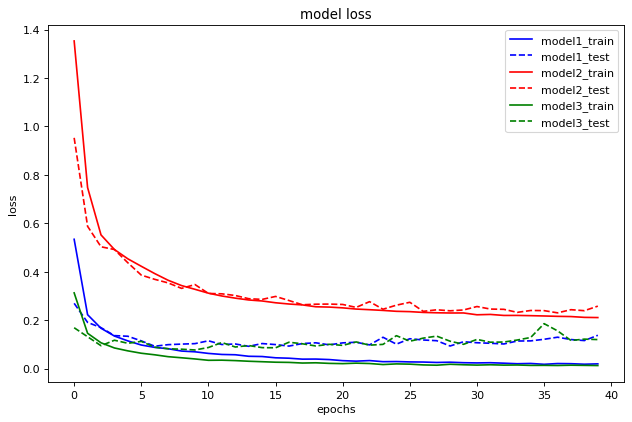

In [14]:
epoch = 40
fig = plt.figure(figsize=(8, 10), dpi=80)
plt.subplot(2,1,2)
plt.plot(np.arange(0,epoch), model_loss['loss0'], "b", label='model1_train')
plt.plot(np.arange(0,epoch), test_loss['loss0'], "b--", label='model1_test')
plt.plot(np.arange(0,epoch), model_loss['loss1'], "r", label='model2_train')
plt.plot(np.arange(0,epoch), test_loss['loss1'], "r--", label='model2_test')
plt.plot(np.arange(0,epoch), model_loss['loss2'], "g", label='model3_train')
plt.plot(np.arange(0,epoch), test_loss['loss2'], "g--", label='model3_test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.tight_layout()
fig.savefig('hw1.1_dnn_loss.png')

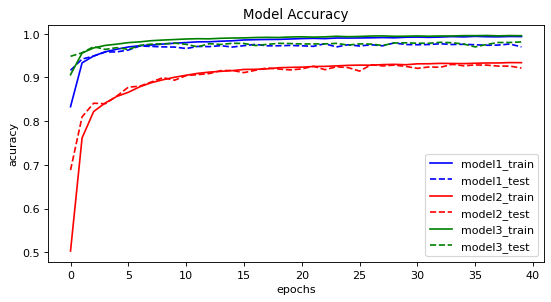

In [6]:
epoch=40
fig = plt.figure(figsize=(7, 7), dpi=80)
plt.subplot(2,1,2)
plt.plot(np.arange(0,epoch), model_acc['acc0'], "b", label='model1_train')
plt.plot(np.arange(0,epoch), test_acc['acc0'], "b--", label='model1_test')
plt.plot(np.arange(0,epoch), model_acc['acc1'], "r", label='model2_train')
plt.plot(np.arange(0,epoch), test_acc['acc1'], "r--", label='model2_test')
plt.plot(np.arange(0,epoch), model_acc['acc2'], "g", label='model3_train')
plt.plot(np.arange(0,epoch), test_acc['acc2'], "g--", label='model3_test')
plt.title('Model Accuracy')
plt.ylabel('acuracy')
plt.xlabel('epochs')
plt.legend()
plt.tight_layout()
fig.savefig('hw1.1_dnn_acc.png')

# Convolutional Neural Network (CNN)

In [7]:
torch.manual_seed(0)

class CNN0(nn.Module):
    def __init__(self):
        super(CNN0, self).__init__()
        self.conv1 = Conv2d(1,8, kernel_size=3,stride=1,padding=1)
        self.pool = MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = Conv2d(8,16, kernel_size=3,stride=1,padding=1)
        self.fc1 = nn.Linear(16*7*7,512)
        self.fc2 = nn.Linear(512,10)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x) 
        #flatten
        x = x.reshape(x.shape[0], -1)
        x = F.dropout(F.relu(self.fc1(x)), p=0.2)
        x = self.fc2(x)     
        return x
    
    

class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = Conv2d(1,16, kernel_size=(4),stride=2,padding=2)
        self.pool = MaxPool2d(kernel_size=2, stride=3, padding=1)
        self.conv2 = Conv2d(16,32, kernel_size=3,stride=1,padding=1)
        self.fc1 = nn.Linear(32*6*6,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,128)
        self.fc4 = nn.Linear(128,10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        #flatten
        x = F.relu(self.conv2(x))
        x = x.reshape(x.shape[0], -1)
        x = F.dropout(F.relu(self.fc1(x)), p=0.2)
        x = F.dropout(F.relu(self.fc2(x)), p=0.2)
        x = F.relu(self.fc3(x))
        x = self.fc4(x)     
        return x   


class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = Conv2d(1,8, kernel_size=3,stride=1,padding=1)
        self.pool = MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = Conv2d(8,16, kernel_size=3,stride=1,padding=1)
        self.fc1 = nn.Linear(16*7*7,120)
        self.fc2 = nn.Linear(120,80)
        self.fc3 = nn.Linear(80,50)
        self.fc4 = nn.Linear(50,24)
        self.fc5 = nn.Linear(24,10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        #flatten
        x = x.reshape(x.shape[0], -1)
        x = F.dropout(F.relu(self.fc1(x)), p=0.2)
        x = F.dropout(F.relu(self.fc2(x)), p=0.2)
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)     
        return x    
    


In [35]:
md=CNN2()
xp = torch.randn(64,1,28,28)
print(md(xp).shape)

torch.Size([64, 10])


In [9]:
cnn_net={0: CNN0(), 1: CNN1(), 2: CNN2() }

cnntrain_loss = {'loss0': [],'loss1': [],'loss2': [] }

cnntest_loss = {'loss0': [], 'loss1': [], 'loss2': [] }

cnntrain_acc = {'acc0': [], 'acc1': [], 'acc2': [] }

cnntest_acc = {'acc0': [], 'acc1': [], 'acc2': [] }


loss_fn = nn.CrossEntropyLoss()
epoch = 40
for i in range(3):
    print('\n=====================================================CNN Model{}======================================================'.format(i))
    cmodel = cnn_net[i]
    cmodel.to(device)
    optimize = optim.Adam(cmodel.parameters(), lr=0.0001, weight_decay=0.003)
    trainloss = cnntrain_loss['loss'+str(i)] 
    trainacc = cnntrain_acc['acc'+str(i)] 
    testacc = cnntest_acc['acc'+str(i)]
    testloss = cnntest_loss['loss'+str(i)] 
    
    step=0
    for e in range(1,epoch+1):
        t_loss = 0
        train_acc = 0
        for images, labels in trainloader:
            step+=1
            optimize.zero_grad()
            images, labels = images.to(device), labels.to(device)
            logps = cmodel.forward(images) #forward propagation
            loss = loss_fn(logps, labels) #calculate loss
            loss.backward() #backward propagation
            optimize.step() #update weights
            loss = loss.item()
            t_loss+=loss
            _, preds = logps.max(1)
            train_acc += torch.mean((preds==labels).type(torch.FloatTensor)).item()

        with torch.no_grad():
            val_loss = 0
            acc = 0
            cmodel.eval()
            for images, target in testloader:
                images, target = images.to(device), target.to(device)
                logps = cmodel.forward(images) #forward propagation
                loss = loss_fn(logps, target).item() #calculate loss
                val_loss+=loss
                _, pred = logps.max(1)
                acc += torch.mean((pred==target).type(torch.FloatTensor)).item()

            if e%10 == 0:
                print("Epoch: {}/{}  Step:{}  Train Loss: {:.5f}  Train Acc: {:.2f}%  Test Loss: {:.5f}  Test Acc: {:.2f}%".\
                  format(e, epoch, step, t_loss/len(trainloader), train_acc/len(trainloader)*100, val_loss/len(testloader), acc/len(testloader)*100))
           
            trainloss.append(t_loss/len(trainloader))
            testloss.append(val_loss/len(testloader))
            trainacc.append(train_acc/len(trainloader))
            testacc.append(acc/len(testloader))
        cmodel.train()
        


=====================================================CNN Model0======================================================
Epoch: 10/40  Step:9380  Train Loss: 0.06709  Train Acc: 98.06%  Test Loss: 0.06289  Test Acc: 98.11%
Epoch: 20/40  Step:18760  Train Loss: 0.04802  Train Acc: 98.67%  Test Loss: 0.04711  Test Acc: 98.52%
Epoch: 30/40  Step:28140  Train Loss: 0.04134  Train Acc: 98.84%  Test Loss: 0.03987  Test Acc: 98.83%
Epoch: 40/40  Step:37520  Train Loss: 0.03844  Train Acc: 98.95%  Test Loss: 0.04050  Test Acc: 98.85%

=====================================================CNN Model1======================================================
Epoch: 10/40  Step:9380  Train Loss: 0.12124  Train Acc: 96.30%  Test Loss: 0.11575  Test Acc: 96.33%
Epoch: 20/40  Step:18760  Train Loss: 0.08768  Train Acc: 97.37%  Test Loss: 0.08573  Test Acc: 97.33%
Epoch: 30/40  Step:28140  Train Loss: 0.07461  Train Acc: 97.75%  Test Loss: 0.07238  Test Acc: 97.72%
Epoch: 40/40  Step:37520  Train Loss: 0.067

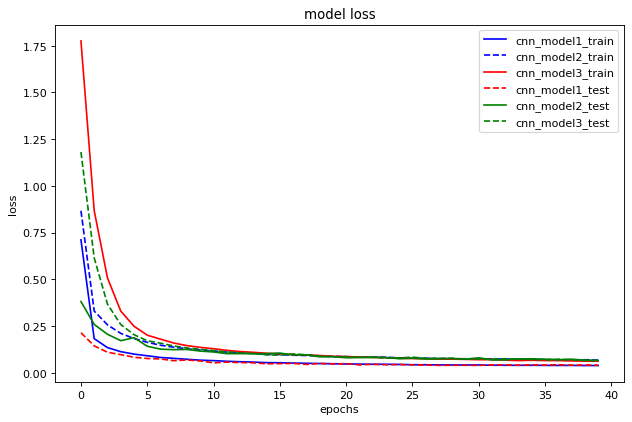

In [19]:
fig = plt.figure(figsize=(8, 10), dpi=80)
plt.subplot(2,1,2)
plt.plot(np.arange(0,epoch), cnntrain_loss['loss0'], "b")
plt.plot(np.arange(0,epoch), cnntrain_loss['loss1'], "b--")
plt.plot(np.arange(0,epoch), cnntrain_loss['loss2'], "r")
plt.plot(np.arange(0,epoch), cnntest_loss['loss0'], "r--")
plt.plot(np.arange(0,epoch), cnntest_loss['loss1'], "g")
plt.plot(np.arange(0,epoch), cnntest_loss['loss2'], "g--")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['cnn_model1_train', 'cnn_model2_train', 'cnn_model3_train', 'cnn_model1_test', 'cnn_model2_test', 'cnn_model3_test'])
plt.tight_layout()
fig.savefig('hw1.1_cnn_loss.png')

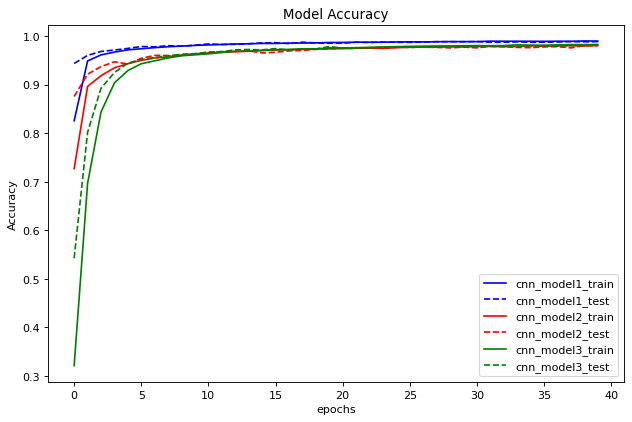

In [12]:
fig = plt.figure(figsize=(8, 10), dpi=80)
plt.subplot(2,1,2)
plt.plot(np.arange(0,epoch), cnntrain_acc['acc0'], "b")
plt.plot(np.arange(0,epoch), cnntest_acc['acc0'], "b--")
plt.plot(np.arange(0,epoch), cnntrain_acc['acc1'], "r")
plt.plot(np.arange(0,epoch), cnntest_acc['acc1'], "r--")
plt.plot(np.arange(0,epoch), cnntrain_acc['acc2'], "g")
plt.plot(np.arange(0,epoch), cnntest_acc['acc2'], "g--")
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['cnn_model1_train', 'cnn_model1_test', 'cnn_model2_train', 'cnn_model2_test', 'cnn_model3_train', 'cnn_model3_test'])
plt.tight_layout()
fig.savefig('hw1.1_cnn_acc.png')